In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def read_file(file):
    documents = []
    labels = []
    with open(file, 'r', encoding='utf-8') as f:
        for row in f:
            elems = row.strip().split()
            if len(elems) > 3:
                documents.append(elems[3:])
                labels.append(elems[1])
    return documents, labels

In [4]:
documents, labels = read_file('all_sentiment_shuffled-1.rtf')
print(documents[10], labels[10])

['martin', 'short', 'is', 'priceless', 'in', 'this', 'movie', '-', 'i', 'enjoyed', 'every', 'minute', '.', '\\'] pos


In [5]:
df = pd.DataFrame({'document': documents, 'label': labels})
df.head()

,document,label
0,"[neg, 241.txt, i, bought, this, album, because...",\strokec2
1,"[i, was, misled, and, thought, i, was, buying,...",neg
2,"[i, have, introduced, many, of, my, ell, ,, hi...",neg
3,"[anything, you, purchase, in, the, left, behin...",pos
4,"[i, loved, these, movies, ,, and, i, cant, wia...",pos


In [6]:
df.shape

(11914, 2)

In [7]:
import string

df['document'] = df['document'].apply(lambda x: ' '.join([i for i in x if i not in string.punctuation]))
df['label'] = df['label'].apply(lambda x: 1 if x == 'pos' else 0)
df.head()

,document,label
0,neg 241.txt i bought this album because i love...,0
1,i was misled and thought i was buying the enti...,0
2,i have introduced many of my ell high school s...,0
3,anything you purchase in the left behind serie...,1
4,i loved these movies and i cant wiat for the t...,1


<AxesSubplot:xlabel='count', ylabel='label'>

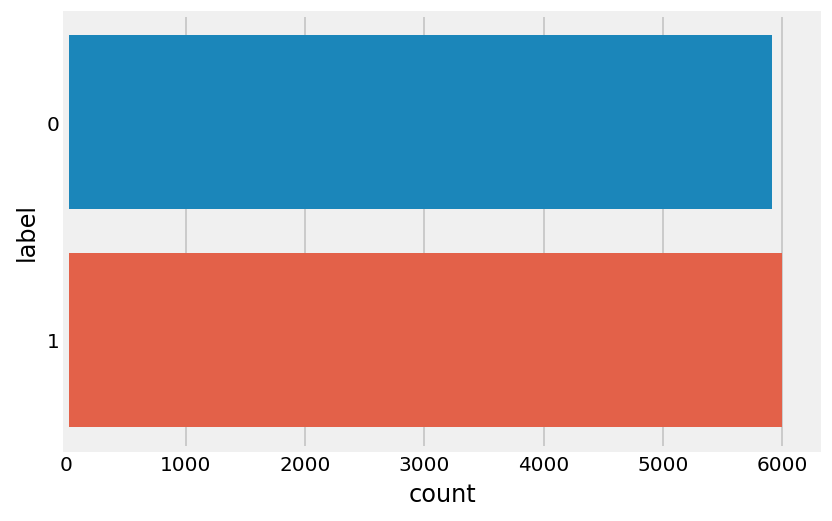

In [8]:
sns.countplot(data=df, y='label')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['document'], df['label'], train_size=.8)
X_train.shape, X_test.shape

((9531,), (2383,))

In [10]:
X_train[0]

"neg 241.txt i bought this album because i loved the title song it 's such a great song how bad can the rest of the album be right well the rest of the songs are just filler and are n't worth the money i paid for this it 's either shameless bubblegum or oversentimentalized depressing tripe kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town i 'll get down off my soapbox now but country music really needs to get back to it 's roots and stop this pop nonsense what country music really is and what it is considered to be by mainstream are two different things"

In [11]:
type(X_train)

pandas.core.series.Series

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

model = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])
naive_bayes_classifier=model.fit(X_train, y_train)
y_preds = naive_bayes_classifier.predict(X_test)

In [13]:
cf_matrix=confusion_matrix(y_test, y_preds)
print(cf_matrix)

[[1030  198]
 [ 174  981]]


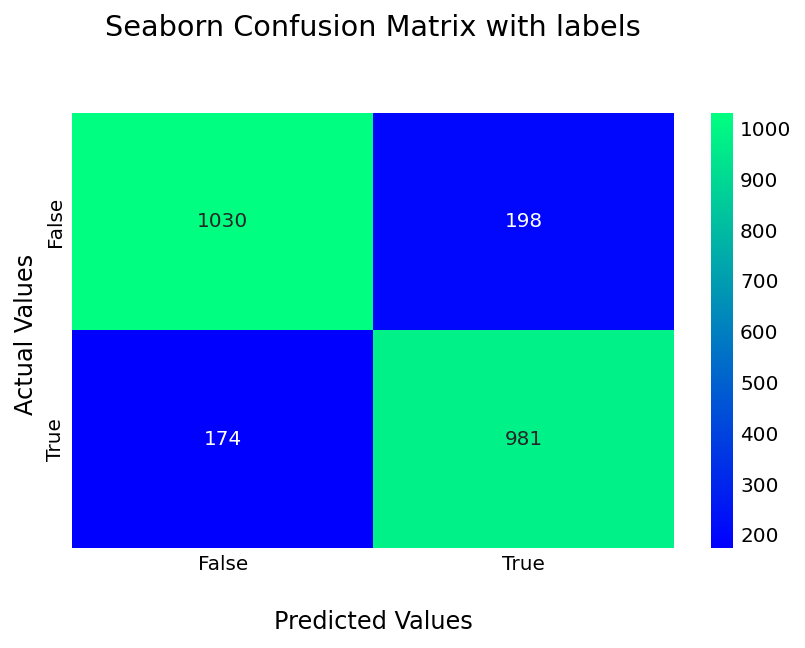

The accuracy is 0.843894250944188


In [14]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='winter',fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print(f"The accuracy is {accuracy_score(y_test, y_preds)}")

In [15]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT CHART: ","\n\n",classification_report(y_test, y_preds))

CLASSIFICATION REPORT CHART:  

               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1228
           1       0.83      0.85      0.84      1155

    accuracy                           0.84      2383
   macro avg       0.84      0.84      0.84      2383
weighted avg       0.84      0.84      0.84      2383



In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(naive_bayes_classifier, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

#print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), scores))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Cross-validation scores:[0.83228512 0.82056663 0.8069255  0.8247639  0.8363064  0.82266527
 0.84260231 0.83420776 0.81427072 0.82686254]


Cross-Validation accuracy: 0.826 +/- 0.010


In [17]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,document,label
11639,no problems like the small format bottle easy ...,1
9817,well i like the song i shall believe and that ...,0
3808,the novel a northern light by jennifer donnell...,0
4559,truly frightening gruesome a gore-fest a blood...,1
9828,i love the firm workouts and i love the instru...,0
...,...,...
3579,camera worked great for us for 6 months easy t...,0
9754,this is a great back pack if there is anything...,1
8669,i have been using adobe acrobat for a few year...,1
11501,this book was written in the 80s was copy writ...,0


In [18]:
log_probas = model.predict_log_proba(X_test)
(log_probas)

array([[-0.88153646, -0.53468485],
       [-0.59750988, -0.79890766],
       [-1.67010884, -0.20853401],
       ...,
       [-1.28357924, -0.3244068 ],
       [-0.43019363, -1.05091743],
       [-0.67331257, -0.71338318]])

In [19]:
test_data['prediction'] = y_preds
test_data['neg_log_prob'] = log_probas[:, 0]
test_data['pos_log_prob'] = log_probas[:, 1]
test_data

,document,label,prediction,neg_log_prob,pos_log_prob
11639,no problems like the small format bottle easy ...,1,1,-0.881536,-0.534685
9817,well i like the song i shall believe and that ...,0,0,-0.597510,-0.798908
3808,the novel a northern light by jennifer donnell...,0,1,-1.670109,-0.208534
4559,truly frightening gruesome a gore-fest a blood...,1,0,-0.637861,-0.751670
9828,i love the firm workouts and i love the instru...,0,0,-0.644053,-0.744777
...,...,...,...,...,...
3579,camera worked great for us for 6 months easy t...,0,0,-0.379574,-1.152498
9754,this is a great back pack if there is anything...,1,1,-0.813853,-0.585454
8669,i have been using adobe acrobat for a few year...,1,1,-1.283579,-0.324407
11501,this book was written in the 80s was copy writ...,0,0,-0.430194,-1.050917


In [20]:
test_data['error_diff'] = np.abs(test_data['neg_log_prob'] - test_data['pos_log_prob'])
test_data

,document,label,prediction,neg_log_prob,pos_log_prob,error_diff
11639,no problems like the small format bottle easy ...,1,1,-0.881536,-0.534685,0.346852
9817,well i like the song i shall believe and that ...,0,0,-0.597510,-0.798908,0.201398
3808,the novel a northern light by jennifer donnell...,0,1,-1.670109,-0.208534,1.461575
4559,truly frightening gruesome a gore-fest a blood...,1,0,-0.637861,-0.751670,0.113810
9828,i love the firm workouts and i love the instru...,0,0,-0.644053,-0.744777,0.100724
...,...,...,...,...,...,...
3579,camera worked great for us for 6 months easy t...,0,0,-0.379574,-1.152498,0.772924
9754,this is a great back pack if there is anything...,1,1,-0.813853,-0.585454,0.228399
8669,i have been using adobe acrobat for a few year...,1,1,-1.283579,-0.324407,0.959172
11501,this book was written in the 80s was copy writ...,0,0,-0.430194,-1.050917,0.620724


In [21]:
test_data.query('label != prediction').sort_values('error_diff', ascending=True)

,document,label,prediction,neg_log_prob,pos_log_prob,error_diff
5602,i bought it for my 18-55 ef-s and it looks lik...,0,1,-0.693438,-0.692857,0.000581
612,in the commencement mr. utterson and his cousi...,0,1,-0.694298,-0.691998,0.002299
11752,vet producer don was is aboard for this one an...,1,0,-0.691770,-0.694526,0.002756
4846,my daughter at u of m got me interested in the...,1,0,-0.691651,-0.694646,0.002995
7936,i absolutely love this camera i got it about 3...,1,0,-0.690966,-0.695333,0.004367
...,...,...,...,...,...,...
275,great cd imus in the morning recommended highl...,0,1,-1.627936,-0.218572,1.409364
7481,great cd imus in the morning recommended highl...,0,1,-1.627936,-0.218572,1.409364
1405,i started off using turbotax this year but ret...,1,0,-0.210928,-1.659851,1.448923
3808,the novel a northern light by jennifer donnell...,0,1,-1.670109,-0.208534,1.461575
